In [176]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
df19 = pd.read_csv("player_stats_2018_2019.csv")

In [63]:
df19["season"] = 19

In [64]:
df18 = pd.read_csv("player_stats_2017_2018.csv")

In [65]:
df18["season"] = 18

In [66]:
df17 = pd.read_csv("player_stats_2016_2017.csv")

In [67]:
df17["season"] = 17

In [68]:
df16 = pd.read_csv("player_stats_2015_2016.csv")

In [69]:
df16["season"] = 16

In [70]:
df15 = pd.read_csv("player_stats_2014_2015.csv")

In [71]:
df15["season"] = 15

In [72]:
df14 = pd.read_csv("player_stats_2013_2014.csv")

In [73]:
df14["season"] = 14

In [74]:
df13 = pd.read_csv("player_stats_2012_2013.csv")

In [75]:
df13["season"] = 13

In [76]:
df12 = pd.read_csv("player_stats_2011_2012.csv")

In [77]:
df12["season"] = 12

In [78]:
df11 = pd.read_csv("player_stats_2010_2011.csv")

In [79]:
df11["season"] = 11

In [80]:
df10 = pd.read_csv("player_stats_2009_2010.csv")

In [81]:
df10["season"] = 10

In [82]:
df9 = pd.read_csv("player_stats_2008_2009.csv")

In [83]:
df9["season"] = 9

In [84]:
df8 = pd.read_csv("player_stats_2007_2008.csv")

In [85]:
df8["season"] = 8

In [86]:
df7 = pd.read_csv("player_stats_2006_2007.csv")

In [87]:
df7["season"] = 7

In [88]:
df6 = pd.read_csv("player_stats_2005_2006.csv")

In [89]:
df6["season"] = 6

In [90]:
master = pd.DataFrame()

In [91]:
master = master.append([df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19], ignore_index=True, sort=False)

In [92]:
master.shape

(5822, 53)

In [93]:
master = master.sort_values(by=['season','Rk'], ascending=[0,1])

In [94]:
#CALCULATE ADDITIONAL DATA POINTS FOR FEATURES
for index, row in master.iterrows():
    current_player = row["Player"]
    current_season = row["season"]
    prev_season = current_season - 1
    if(current_player in master[master["season"]==prev_season]["Player"].values):
        
        #FEATURE 1: OPPORTUNITY - DATA POINTS
        
        # DELTA USG
        prev_usg = master[master["season"]==prev_season][master["Player"]==current_player]["USG%"]
        current_usg = row["USG%"]                                                 
        delta_usg = float(current_usg) - float(prev_usg)
        master.loc[index,"Delta USG%"] = delta_usg
        # DELTA AST
        prev_ast = master[master["season"]==prev_season][master["Player"]==current_player]["AST%"]
        current_ast = row["AST%"] 
        delta_ast = float(current_ast) - float(prev_ast)
        master.loc[index,"Delta AST%"] = delta_ast
        
        #FEATURE 2: IMPORTANT DELTAS - DATA POINTS
        
        #DELTA POINTS
        prev_pts = master[master["season"]==prev_season][master["Player"]==current_player]["PTS"]
        current_pts = row["PTS"] 
        delta_pts = float(current_pts) - float(prev_pts)
        master.loc[index,"Delta PTS"] = delta_pts
        #DELTA TOTAL REBOUNDS
        prev_trb = master[master["season"]==prev_season][master["Player"]==current_player]["TRB"]
        current_trb = row["TRB"] 
        delta_trb = float(current_trb) - float(prev_trb)
        master.loc[index,"Delta TRB"] = delta_trb
        #DELTA ASSISTS
        prev_asts = master[master["season"]==prev_season][master["Player"]==current_player]["AST"]
        current_asts = row["AST"] 
        delta_asts = float(current_asts) - float(prev_asts)
        master.loc[index,"Delta AST"] = delta_asts
        #DELTA STL
        prev_stl = master[master["season"]==prev_season][master["Player"]==current_player]["STL"]
        current_stl = row["STL"] 
        delta_stl = float(current_stl) - float(prev_stl)
        master.loc[index,"Delta STL"] = delta_stl
        #DELTA STL
        prev_blk = master[master["season"]==prev_season][master["Player"]==current_player]["BLK"]
        current_blk = row["BLK"] 
        delta_blk = float(current_blk) - float(prev_blk)
        master.loc[index,"Delta BLK"] = delta_blk
        

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:

In [95]:
# New Feature 1 : Opportunity
master["Opportunity"] = master["Delta USG%"] + (master["Delta AST%"]*-1)

In [96]:
# New Feature 2: Important Deltas
master["Impt Deltas"] = master["Delta PTS"] + master["Delta TRB"] + master["Delta AST"]

In [97]:
# New Feature 3: Defensive Ability
master["Defensive Ability"] = ( master["STL"] + master["BLK"] ) / master["PF"]

In [98]:
# New Feature 4: Total Mins
master["Total Mins"] = master["MP"] * master["G"]

In [99]:
# DATA CLEANING

# Remove any players with current season less than 1000 mins and previous season less than 250 mins
dropped = 0
master = master[master["Total Mins"] > 250]
print(master.shape)
for index, row in master.iterrows():
    current_player = row["Player"]
    current_season = row["season"]
    prev_season = current_season - 1
    if(current_player in master[master["season"]==prev_season]["Player"].values):
        if (row["Total Mins"] < 1000):
            master.drop(index, inplace=True)
            dropped += 1

print("dropped this many < 1000: " + str(dropped) + "rows")

(4772, 64)
dropped this many < 1000: 733rows


In [100]:
master.shape

(4039, 64)

# Drop 2018-2019 season

In [101]:
training_data = master[master["season"]!=19]

In [102]:
# Define feature set 1
feature_set_1 = pd.DataFrame
feature_set_1 = training_data[['Player','Age','Total Mins','Opportunity','Defensive Ability','PTS','TRB','AST','STL','BLK','TS%','WS','BPM','MIP']]

In [103]:
# Define feature set 2
feature_set_2 = pd.DataFrame
feature_set_2 = training_data[['Player','Age','Total Mins','Defensive Ability','FG%','3P%','FT%','WS','BPM','MIP']]

In [104]:
# Define feature set 3
feature_set_3 = pd.DataFrame
feature_set_3 = training_data[['Player','Age','Total Mins','Delta PTS','Delta TRB','Delta AST','Delta STL', 'Delta BLK','BPM','MIP']]

# Use feature set 3 2018-2019 as testing data

In [105]:
testing_data = master[master["season"]==19]

In [106]:
last_season_data = pd.DataFrame
last_season_data = testing_data[['Player','Age','Total Mins','Delta PTS','Delta TRB','Delta AST','Delta STL', 'Delta BLK','BPM','MIP']]

In [107]:
%store master

Stored 'master' (DataFrame)


In [108]:
%store feature_set_1
%store feature_set_2
%store feature_set_3
%store last_season_data

Stored 'feature_set_1' (DataFrame)
Stored 'feature_set_2' (DataFrame)
Stored 'feature_set_3' (DataFrame)
Stored 'last_season_data' (DataFrame)


# Use master 2018-2019 for clustering

In [109]:
clustering_data = master[master["season"]==19]

In [110]:
%store clustering_data

Stored 'clustering_data' (DataFrame)


# Data Exploration Graphs

In [137]:
master.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'MIP', 'season', 'Rk.1', 'Delta USG%', 'Delta AST%',
       'Delta PTS', 'Delta TRB', 'Delta AST', 'Delta STL', 'Delta BLK',
       'Opportunity', 'Impt Deltas', 'Defensive Ability', 'Total Mins'],
      dtype='object')

In [146]:
corr_data = pd.DataFrame(master[['PTS','FG%','3P%','FT%','TS%']])

Text(0.5, 1, 'Correlation: Points vs. Shooting Efficiencies')

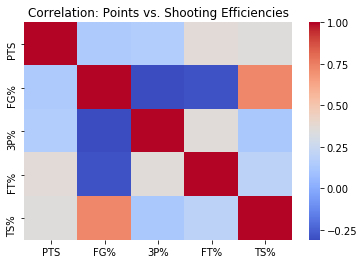

In [160]:
sns.heatmap(corr_data.corr(),cmap='coolwarm')
plt.title('Correlation: Points vs. Shooting Efficiencies')

Text(0.5, 0.98, 'Age vs. Points')

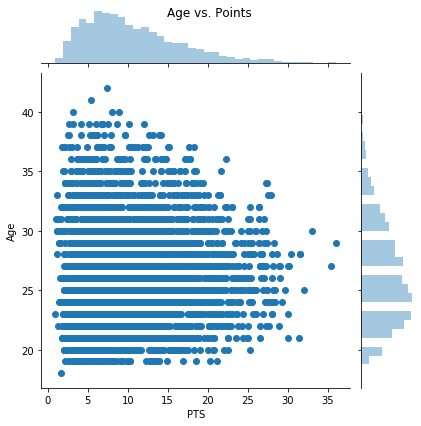

In [166]:
sns.jointplot(x='PTS',y='Age',data=master)
plt.suptitle("Age vs. Points")

Text(0.5, 0.98, 'Points vs. Minutes Played')

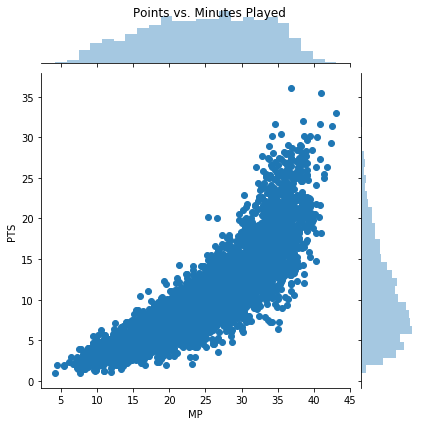

In [165]:
sns.jointplot(x='MP',y='PTS',data=master)
plt.suptitle('Points vs. Minutes Played')

Text(0.5, 1.0, 'Age: MIP vs. Non-MIP')

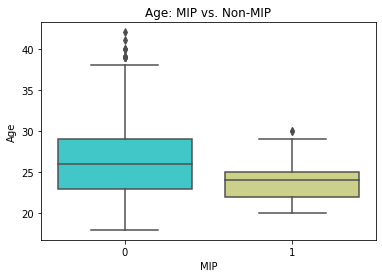

In [158]:
sns.boxplot(x='MIP',y='Age',data=master,palette='rainbow')
plt.title('Age: MIP vs. Non-MIP')

Text(0.5, 1.0, 'Points: MIP vs. Non-MIP')

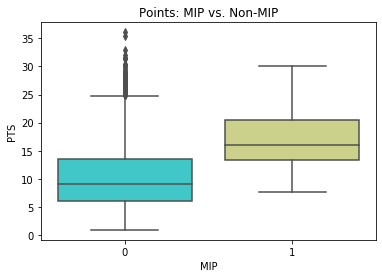

In [157]:
sns.boxplot(x='MIP',y='PTS',data=master,palette='rainbow')
plt.title('Points: MIP vs. Non-MIP')

Text(0.5, 1.0, 'MIP Positions Frequency')

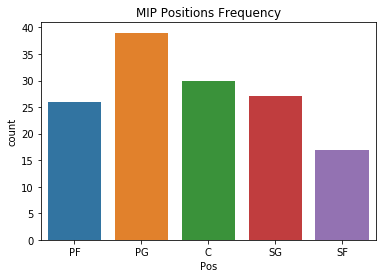

In [167]:
mips = master[master["MIP"]==1]
sns.countplot(x="Pos", data=mips)
plt.title('MIP Positions Frequency')

In [ ]:
test = pd.DataFrame(master["Delta AST"])
test = test.dropna()
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(master["Delta TRB"], master["Delta PTS"], test, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(master["Delta TRB"], master["Delta PTS"], test, rstride=1, cstride=1, cmap='coolwarm', linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

In [ ]:
x = master["Delta TRB"]
y = master["Delta PTS"]
z = pd.DataFrame(master["Delta AST"])
z = z.dropna()

ax.plot_surface(x, y, z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none')
ax.set_title('surface');